In [49]:
# importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from imblearn.over_sampling import SMOTE


from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
from google.colab import files
import io
uploaded = files.upload()
bank =  pd.read_csv(io.BytesIO(uploaded['bank.csv']))


Saving bank.csv to bank.csv


In [5]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,31,blue-collar,married,basic.6y,unknown,no,no,cellular,jul,mon,196,2,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
1,32,housemaid,single,university.degree,unknown,yes,no,cellular,jul,tue,71,4,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
2,26,admin.,married,high.school,no,yes,no,cellular,apr,mon,61,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
3,44,blue-collar,married,basic.4y,unknown,no,no,cellular,may,fri,361,3,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
4,32,technician,married,unknown,no,yes,no,cellular,jul,fri,107,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no


2. Summarize important observations from the data set (5 MARKS)
Some pointers which would help you, but don’t be limited by these
  1. Find out number of rows; no. & types of variables (continuous, categorical etc.)
  2. Calculate five-point summary for numerical variables
  3. Summarize observations for categorical variables – no. of categories, % observations in each
category

In [6]:
bank.shape

(2000, 21)

In [11]:
print(f"Number of Categorical Columns:{bank.select_dtypes(include='object').shape[1]}")
print(f"Number of Continuous Columns:{bank.select_dtypes(exclude='object').shape[1]}")

Number of Categorical Columns:11
Number of Continuous Columns:10


In [12]:
bank.select_dtypes(exclude='object').describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,40.245500,250.380000,2.635500,964.745000,0.171000,0.101350,93.579410,-40.585500,3.637492,5167.775650
std,10.484188,245.386067,3.169174,181.260237,0.492829,1.551405,0.564451,4.563541,1.725587,71.453919
min,18.000000,4.000000,1.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.354000,5099.100000
50%,38.000000,173.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,48.000000,306.250000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,85.000000,2635.000000,40.000000,999.000000,5.000000,1.400000,94.767000,-26.900000,5.000000,5228.100000


In [20]:
for i in bank.select_dtypes(include='object').columns:
  print(f'Number of Categories for {i}:{bank[i].nunique()}')
  print(f"Percentage of Categories for {i}:",(bank[i].value_counts()/bank[i].shape[0])*100)



Number of Categories for job:12
Percentage of Categories for job: admin.           26.55
blue-collar      21.45
technician       16.40
services          9.60
management        8.00
retired           4.80
entrepreneur      3.05
housemaid         2.80
self-employed     2.45
student           2.15
unemployed        2.10
unknown           0.65
Name: job, dtype: float64
Number of Categories for marital:4
Percentage of Categories for marital: married     59.65
single      28.25
divorced    11.90
unknown      0.20
Name: marital, dtype: float64
Number of Categories for education:8
Percentage of Categories for education: university.degree      28.40
high.school            26.15
basic.9y               13.00
professional.course    12.15
basic.4y               10.75
basic.6y                4.90
unknown                 4.60
illiterate              0.05
Name: education, dtype: float64
Number of Categories for default:2
Percentage of Categories for default: no         78.6
unknown    21.4
Name: defau

3. Check for defects in the data. Perform necessary actions to ‘fix’ these defects (5 MARKS)
Some pointers which would help you, but don’t be limited by these
  1. Do variables have missing/null values?
  2. Do variables have outliers?
  3. Is the Target distributed evenly? Is it a defect? If Yes, what steps are being taken to rectify
the problem. 


In [0]:
bank[bank['pdays']==999].shape
# Thus there are 1931 rows with 999 values in pdays .That mean they had been contacted  for the first time.
# Thus Replacing 999 with 0 for which implies they had never been contacted before.
bank['pdays'] = bank['pdays'].apply(lambda x: 0 if x ==999 else x)


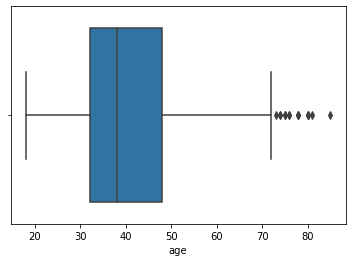

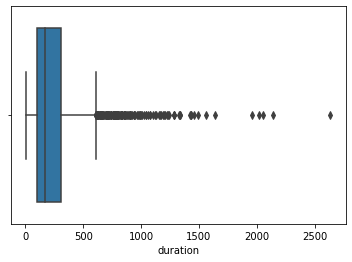

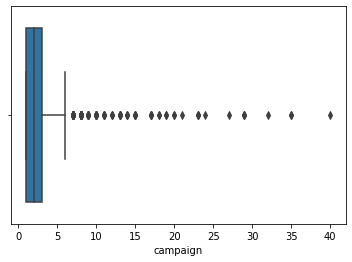

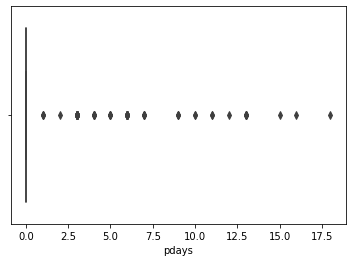

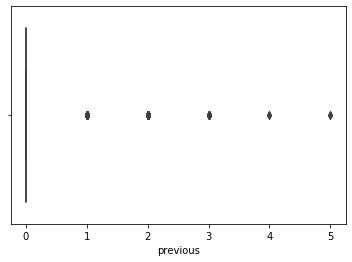

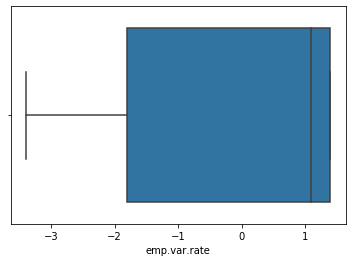

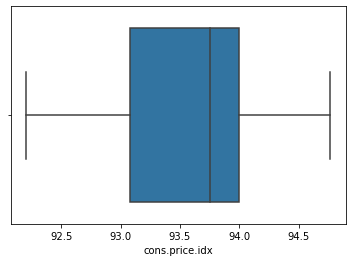

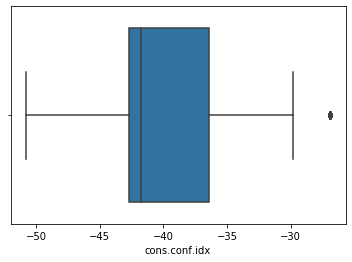

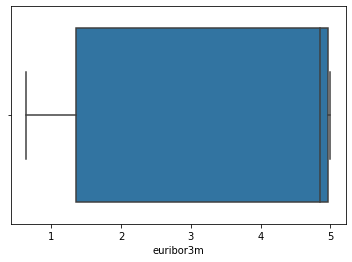

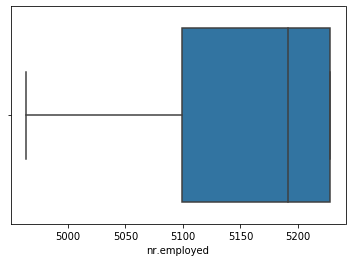

<Figure size 432x288 with 0 Axes>

In [46]:
for cols in bank.select_dtypes(exclude='object').columns:
  sns.boxplot(bank[cols])
  plt.figure()

### From above we can see that in age ,pdays,duration,campaign,previous,cons.conf.idx there are outliers present from the boxplots.

### After observing the domain and data we have decided not to treat the outliers as they are just extreme values .These values if capped or imputed they might effect our predictve model.
### Also there can be biased prediction ,we might loose some useful information.

In [48]:
bank['y'].value_counts()/bank.shape[0]

# We can see that there is 90% of no and only 10 % of yes data present in the sample data.
# Thus Target variable is not evenly distributed which is a defect and our model might be biased if we use this.
#Thus we can use Over Sampling Technique.SMOTE

no     0.901
yes    0.099
Name: y, dtype: float64

### Before going further we are doing Encoding .
### One Hot Encoding has been used

In [0]:
df = pd.get_dummies(bank,drop_first=True)

In [54]:
df.shape


(2000, 53)

In [0]:
df_ori = bank.copy()
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
bank_columns = bank.select_dtypes(include='object').columns
df = bank.select_dtypes(include='object').apply(le.fit_transform)


In [63]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,31,blue-collar,married,basic.6y,unknown,no,no,cellular,jul,mon,196,2,0,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
1,32,housemaid,single,university.degree,unknown,yes,no,cellular,jul,tue,71,4,0,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
2,26,admin.,married,high.school,no,yes,no,cellular,apr,mon,61,1,0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
3,44,blue-collar,married,basic.4y,unknown,no,no,cellular,may,fri,361,3,0,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
4,32,technician,married,unknown,no,yes,no,cellular,jul,fri,107,2,0,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no


In [65]:
df.head()

final_df = pd.concat([df,bank.select_dtypes(exclude='object')],axis=1)
final_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,1,1,1,0,0,0,3,1,1,0,31,196,2,0,0,1.4,93.918,-42.7,4.960,5228.1
1,3,2,6,1,2,0,0,3,3,1,0,32,71,4,0,0,1.4,93.918,-42.7,4.961,5228.1
2,0,1,3,0,2,0,0,0,1,1,0,26,61,1,0,0,-1.8,93.075,-47.1,1.405,5099.1
3,1,1,0,1,0,0,0,6,0,1,0,44,361,3,0,0,-1.8,92.893,-46.2,1.313,5099.1
4,9,1,7,0,2,0,0,3,0,1,0,32,107,2,0,0,1.4,93.918,-42.7,4.963,5228.1


In [66]:
final_df.shape

(2000, 21)

## We can not use this for our encoding as this might lead to curse of dimensionality.
## Thus our Final df is label encoded.

In [93]:
X=final_df.drop('y',axis=1)
y=final_df['y']
X, y = SMOTE(ratio='minority').fit_resample(X, y)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [94]:
X.shape,y.shape

((3604, 20), (3604,))

In [95]:
y[y==1].shape,y[y==0].shape

((1802,), (1802,))

## Thus now we are able to see that classes are divided properly after applying SMOTE and imbalance in Target variable is gone.

In [96]:
final_df.drop('y',axis=1).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'age', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [92]:
#X = pd.DataFrame(X,columns=final_df.drop('y',axis=1).columns)
X.columns
#X.rename({0:''})

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'age', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [82]:
y = pd.DataFrame(y)
y.head()

,0
0,0
1,0
2,0
3,0
4,0


1. Plot relevant categorical plots. Find out which are the variables most correlated or appear to
be in causation with Target? Do you want to exclude some variables from the model based
on this analysis? What other actions will you take?
2. Plot all independent variables with the target & find out the relationship? Perform the
Relevant Tests to find out if the Independent variables are associated with the Target
Variable.
Hint: based on your observations you may want to transform features or create additional
features.

In [137]:
final_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,1,1,1,0,0,0,3,1,1,0,31,196,2,0,0,1.4,93.918,-42.7,4.960,5228.1
1,3,2,6,1,2,0,0,3,3,1,0,32,71,4,0,0,1.4,93.918,-42.7,4.961,5228.1
2,0,1,3,0,2,0,0,0,1,1,0,26,61,1,0,0,-1.8,93.075,-47.1,1.405,5099.1
3,1,1,0,1,0,0,0,6,0,1,0,44,361,3,0,0,-1.8,92.893,-46.2,1.313,5099.1
4,9,1,7,0,2,0,0,3,0,1,0,32,107,2,0,0,1.4,93.918,-42.7,4.963,5228.1


In [159]:
X= pd.DataFrame(X)
y= pd.DataFrame(y)

from sklearn.preprocessing import StandardScaler
a = X.columns
sc =  StandardScaler()
df_scaled=pd.DataFrame(sc.fit_transform(X),columns=final_df.drop('y',axis=1).columns)
df_scaled.head()

df_original = pd.concat([df_scaled,y],axis=1)
df_original.rename(columns={0:'y'},inplace=True)
df_original['y'].value_counts()

1    1802
0    1802
Name: y, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


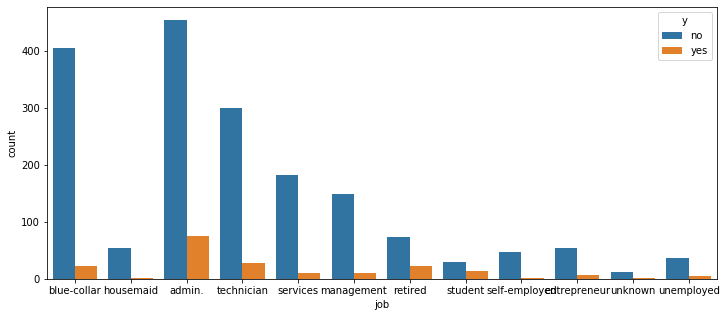

AxesSubplot(0.125,0.125;0.775x0.755)


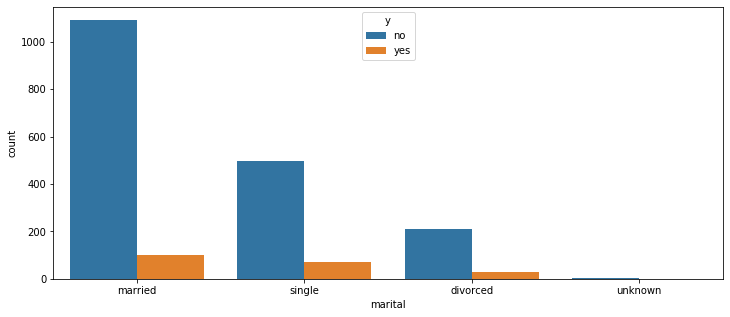

AxesSubplot(0.125,0.125;0.775x0.755)


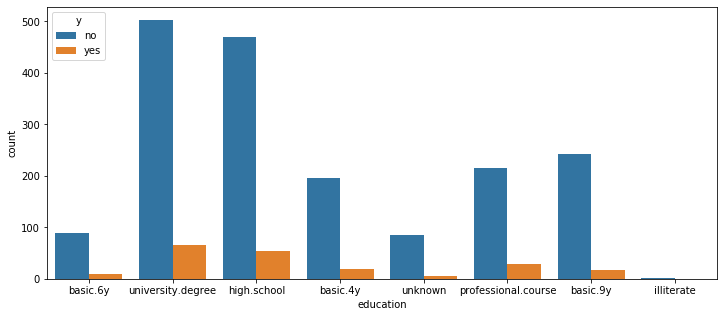

AxesSubplot(0.125,0.125;0.775x0.755)


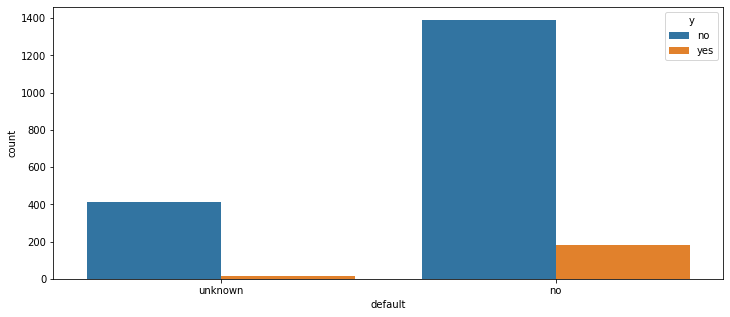

AxesSubplot(0.125,0.125;0.775x0.755)


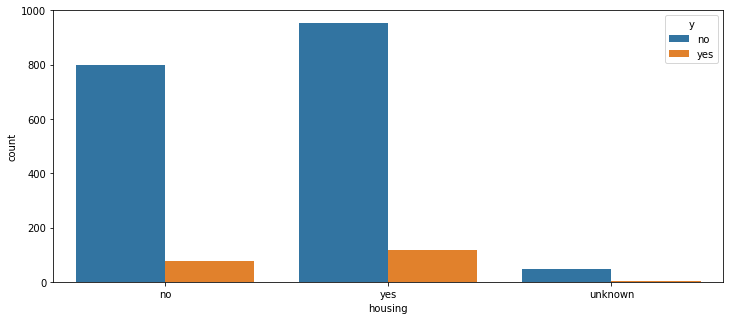

AxesSubplot(0.125,0.125;0.775x0.755)


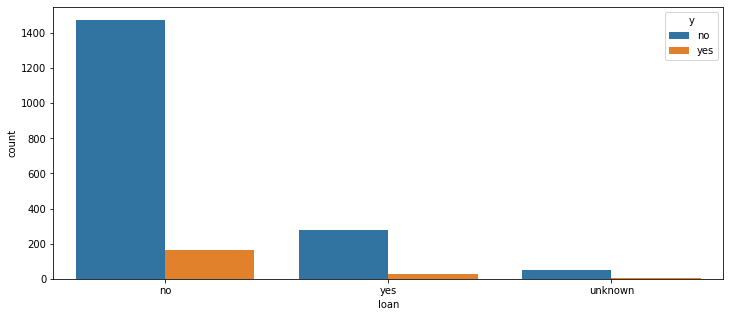

AxesSubplot(0.125,0.125;0.775x0.755)


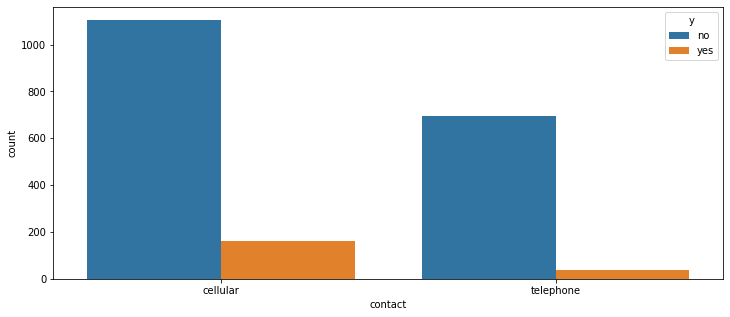

AxesSubplot(0.125,0.125;0.775x0.755)


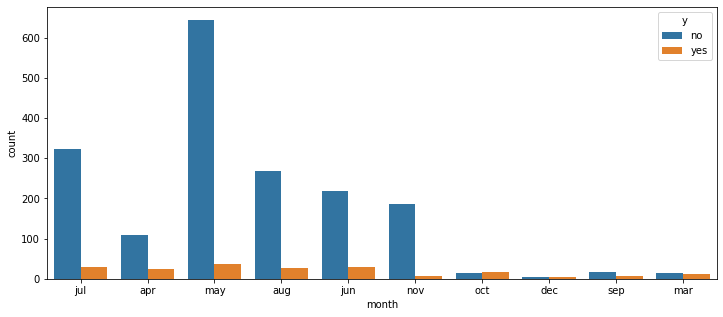

AxesSubplot(0.125,0.125;0.775x0.755)


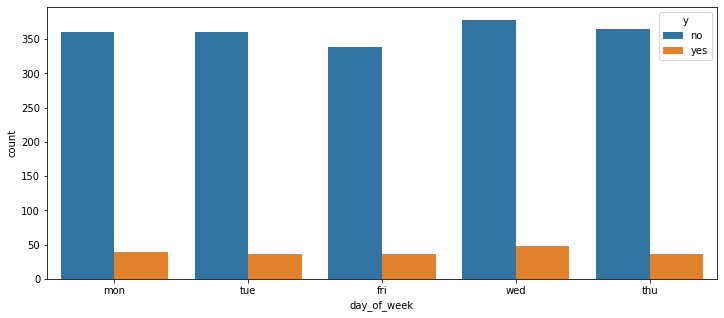

AxesSubplot(0.125,0.125;0.775x0.755)


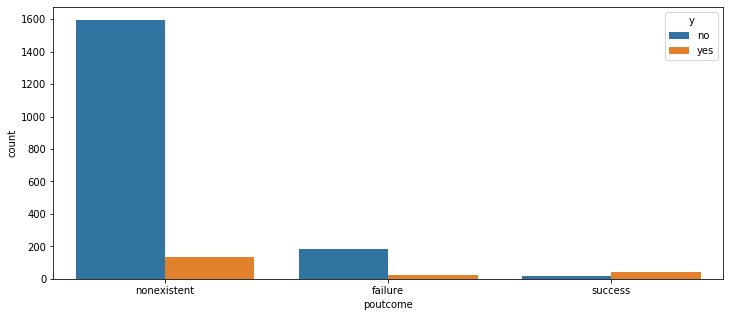

AxesSubplot(0.125,0.125;0.775x0.755)


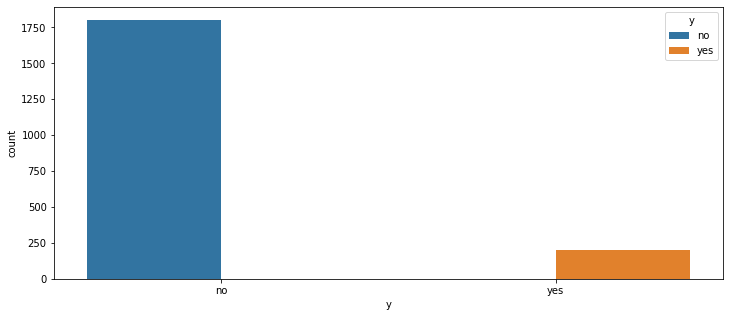

In [129]:
for col in bank.select_dtypes(include='object').columns:
    plt.figure(figsize=(12,5))
    print(sns.countplot(bank[col],hue=bank['y'],orient='v'))
    plt.show()


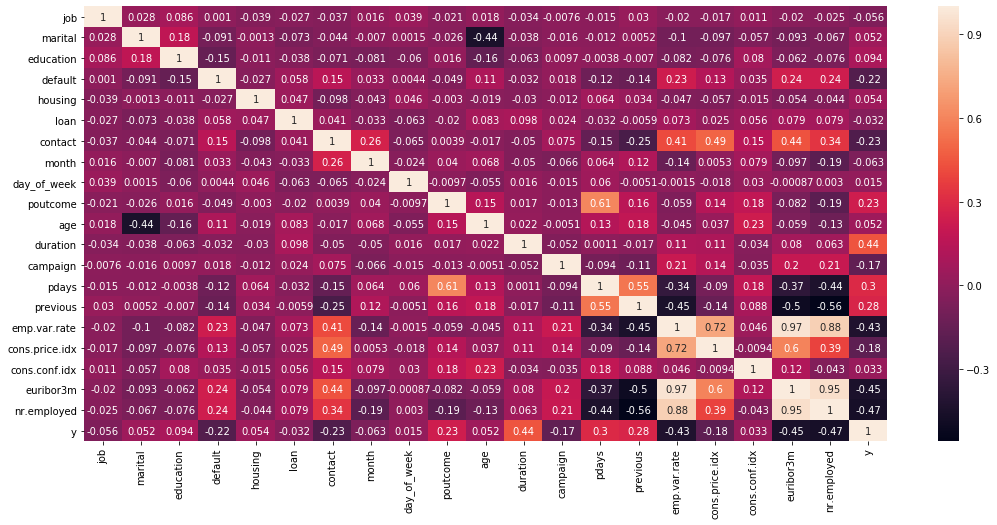

In [160]:

plt.figure(figsize=(18,8))
sns.heatmap(df_original.corr(),annot=True)

## From graph we can see that we can remove:
cons.price.idx
cons.conf.idx
They are not having any impact.

Moreover correlation is distributed thus we can not select features from heatmap only.

In [164]:
import statsmodels.api as sm

X = df_original.drop(['y'],axis=1)
y =  df_original[['y']]
XC= sm.add_constant(X)
model = sm.OLS(y,XC)
model.fit().summary()


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     201.9
Date:                Fri, 24 Jan 2020   Prob (F-statistic):               0.00
Time:                        07:26:14   Log-Likelihood:                -1255.6
No. Observations:                3604   AIC:                             2553.
Df Residuals:                    3583   BIC:                             2683.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5000      0.006     87.303      0.000       0.489       0.511
job               -0.0252      0.006     -4.354      0.000      -0.037      -0.014
marital            0.0106      0.007      1.620      0.105      -0.002       0.023
education          0.0292      0.006      4.790      0.000       0.017       0.041
default           -0.0311      0.006     -5.147      0.000      -0.043      -0.019
housing            0.0235      0.006      4.052      0.000       0.012       0.035
loan              -0.0201      0.006     -3.445      0.001      -0.032      -0.009
contact           -0.0185      0.008     -2.324      0.020      -0.034      -0.003
month             -0.0767      0.007    -10.566      0.000      -0.091      -0.063
day_of_week        0.0040      0.006      0.683      0.495      -0.007       0.015
poutcome           0.0734      0.008      9.295      0.000       0.058       0.089
age                0.0051      0.007      0.736      0.462      -0.008       0.019
duration           0.2455      0.006     41.562      0.000       0.234       0.257
campaign          -0.0202      0.006     -3.405      0.001      -0.032      -0.009
pdays             -0.0077      0.009     -0.838      0.402      -0.026       0.010
previous           0.0127      0.008      1.574      0.116      -0.003       0.029
emp.var.rate      -0.5110      0.036    -14.282      0.000      -0.581      -0.441
cons.price.idx     0.1435      0.018      7.758      0.000       0.107       0.180
cons.conf.idx      0.0140      0.010      1.356      0.175      -0.006       0.034
euribor3m          0.2360      0.059      4.032      0.000       0.121       0.351
nr.employed       -0.0479      0.045     -1.066      0.287      -0.136       0.040
==============================================================================
Omnibus:                      157.278   Durbin-Watson:                   1.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.077
Skew:                          -0.453   Prob(JB):                     2.17e-44
Kurtosis:                       3.719   Cond. No.                         26.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### From above we can infer that :
assuming alpha =0.05
###pvalue for marriage ,pdays previous,cons.conf.idx,nr.employed,day_of_week can be removed . 
### having said that we will be removing duration also from  as given:
###Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

5. Split dataset into train and test (70:30) (5 MARKS)
a. Are both train and test representative of the overall data? How would you ascertain this
statistically?

In [165]:
df_original.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
y,-0.753442,-0.325752,-1.486749,2.446463,-1.261471,-0.476904,-0.669274,-0.488415,-0.802686,-0.015682,-0.849598,-0.519545,-0.123650,-0.337376,-0.498464,1.105353,0.720987,-0.456728,1.058286,1.075906,0
1,-0.152009,1.366351,1.085385,2.446463,0.962174,-0.476904,-0.669274,-0.488415,0.704908,-0.015682,-0.761627,-0.897045,0.683576,-0.337376,-0.498464,1.105353,0.720987,-0.456728,1.058818,1.075906,0
2,-1.054158,-0.325752,-0.457895,-0.443481,0.962174,-0.476904,-0.669274,-1.822816,-0.802686,-0.015682,-1.289450,-0.927245,-0.527263,-0.337376,-0.498464,-0.777694,-0.715772,-1.359460,-0.833289,-0.435673,0
3,-0.753442,-0.325752,-2.001176,2.446463,-1.261471,-0.476904,-0.669274,0.845986,-1.556483,-0.015682,0.294019,-0.021245,0.279963,-0.337376,-0.498464,-0.777694,-1.025961,-1.174810,-0.882241,-0.435673,0
4,1.652291,-0.325752,1.599812,-0.443481,0.962174,-0.476904,-0.669274,-0.488415,-1.556483,-0.015682,-0.761627,-0.788325,-0.123650,-0.337376,-0.498464,1.105353,0.720987,-0.456728,1.059882,1.075906,0


In [0]:
df_after_dropped = df_original.drop(['marital','duration','cons.price.idx','cons.conf.idx','nr.employed','euribor3m'],axis=1)

In [170]:
df_after_dropped.head()


,job,education,default,housing,loan,contact,month,day_of_week,poutcome,age,campaign,pdays,previous,emp.var.rate,y
1,-0.152009,1.085385,2.446463,0.962174,-0.476904,-0.669274,-0.488415,0.704908,-0.015682,-0.761627,0.683576,-0.337376,-0.498464,1.105353,0
2,-1.054158,-0.457895,-0.443481,0.962174,-0.476904,-0.669274,-1.822816,-0.802686,-0.015682,-1.289450,-0.527263,-0.337376,-0.498464,-0.777694,0
3,-0.753442,-2.001176,2.446463,-1.261471,-0.476904,-0.669274,0.845986,-1.556483,-0.015682,0.294019,0.279963,-0.337376,-0.498464,-0.777694,0
4,1.652291,1.599812,-0.443481,0.962174,-0.476904,-0.669274,-0.488415,-1.556483,-0.015682,-0.761627,-0.123650,-0.337376,-0.498464,1.105353,0
5,1.050858,-0.457895,2.446463,0.962174,-0.476904,1.661901,0.845986,-1.556483,-0.015682,0.469960,-0.527263,-0.337376,-0.498464,0.928817,0


In [0]:
from sklearn.model_selection import train_test_split
X=  df_after_dropped.drop('y',axis=1)
y = df_after_dropped['y']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=26)

In [173]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2522, 14), (1081, 14), (2522,), (1081,))

In [178]:
for cols in X_train.columns:
  b = np.mean(np.mean(X_train[cols]))
print(b)


-0.01474077309937474


In [179]:
for cols in X_test.columns:
  a = np.mean(np.mean(X_test[cols]))
print(a)

0.03336806352913924


In [180]:
for cols in X.columns:
  c = np.mean(np.mean(X[cols]))
print(c)

-0.00030678686695013915


In [183]:
(a+b)-c

0.018934077296714643

Though the sample and population mean will not be equal ever . having said that 
there is a very less differnce between the means of the samples.
Thus we can say that they are good representative of the data.

6. Fit a base model and explain the reason of selecting that model. Please write your key
observations. (15 MARKS)
  1. What is the overall Accuracy? Please comment on whether it is good or not.
  2. What is Precision, Recall and F1 Score and what will be the optimization objective keeping in
mind the problem statement.
  3. Which variables are significant?
  4. What is Cohen’s Kappa Value and what inference do you make from the model
  5. Which other key model output parameters do you want to look at? 

In [189]:
#Chossing Logistic Regression for Base model As there

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

X_pred = LogReg.predict(X_train)
y_pred = LogReg.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, X_pred)
confusion_matrix
print(classification_report(y_train, X_pred))


              precision    recall  f1-score   support

           0       0.72      0.79      0.75      1245
           1       0.77      0.69      0.73      1277

    accuracy                           0.74      2522
   macro avg       0.75      0.74      0.74      2522
weighted avg       0.75      0.74      0.74      2522



### As the problem is of 2-class and that means we can use CART algorithm or binary split.
### To keep the complexity low and good evaluation metricas . Logistic Model will be good bit for the base modelling.
### Confusion Matrix and Other Calssification Reports are also available for cross valiadation.
### Score is 75 % which means training data has been able to explain 75% of varations.
### As we can infer from the Classification report and Confusion Matrix from train and test thaat they are similar thus Model is getting trained properly.

Precision is given as 0.72 for class 1 . That means ability to identify relevant data points is 72%.
Recall is given as 0.74 for class 1 . That means ability to identify relevant data points is 72% model’s ability to find all the data points of interest in a dataset.

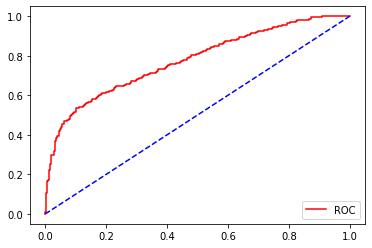

In [186]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#AUC Curve
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,color='r',label="ROC")
plt.plot([0,1],[0,1],color='b',linestyle='--')

plt.legend(loc=4)
plt.show()



In the graph above, the AUC for the red curve will be greater than that for the red curve, meaning the red model is better at achieving a blend of precision and recall. 

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.model_selection import KFold,cross_val_score

models = []

models.append(('LR', LogisticRegression()))
models.append(('RF',RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))


results = []
names = []
x=0
c=0
for name, model in models:
   warnings.simplefilter("ignore")
   c=0
   kfold = KFold(n_splits=50, random_state=0)
   cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
   results.append(cv_results)
   names.append(name)
   print(name,cv_results.mean(), cv_results.std())

LR 0.7229185692541857 0.08461192904575332
RF 0.9494901065449011 0.046274358625761285
KNN 0.8843150684931509 0.09406164842595104
CART 0.9125913242009132 0.07063866605686898
NB 0.7201331811263318 0.08862912287161889


## Thus selecting Decision Tree from above as the Standarde deviation is less while accuracy is also high though it is less than RF but RF has higher std than DT.

In [204]:
#Chossing Logistic Regression for Base model As there

dt = RandomForestClassifier()
dt.fit(X_train, y_train)



dt.score(X_train, y_train)
# from sklearn.metrics import confusion_matrix
# confusion_matrix = confusion_matrix(y_train, X_pred)
# confusion_matrix
# print(classification_report(y_train, X_pred))


0.999603489294211

In [205]:
dt.score(X_test, y_test)


0.9481961147086031

## Thus Choosing Final Model as RAndom Forest Clasifier.

After verifying we will go with Random Forest Classifier Only .


8. Summarize as follows (10 MARKS)
1. Summarize the overall fit of the model and list down the measures to prove that it is a good model
2. Write down a business interpretation/explanation of the model – which variables are affecting
the target the most and explain the relationship. Feel free to use charts or graphs to explain.
3. What changes from the base model had the most effect on model performance?
4. What are the key risks to your results and interpretation?

### Random Forest has been Chosen from  Logistic ,Decision Tree and KNN . Now the reason being it will train the data and will be able to classify accurately with High Precision and High Recall .
### Less Variance Error.




### As we need more people to accept the product. Thus we need to Target large set of people with different age group and stature. Variables like pdays ,duration and previous are good for seeing.


```
# This is formatted as code
```



###Reducing MultiCollinearity ,Autocollinearity ,selecting features based on the pvalues are the impactful measures. Feature Engineering and extraction for Selction.

Key Risks are:
1. Data Leaks .
2. Standaridisation and Transformation can lead to information loss.
3. Feature selection and Hypothesis testing or statistical analysis can be improved.
4. SMOTE has been done . Real Data was imbalanced.